# Logistic regression

Regression analysis is, simply put, about fitting a line to a group of points. A required assumption is that the dependent variable is a scale, with many different values, and with equal distance between the values.

But what happens if the dependent variable only can take the value 0 or 1? For instance, if a person has voted for a certain party (1) or not (0). We can then get strange results from an ordinary regression analysis, such as guessing that a person voted 0.75 for the party, or 1.2, och even -0.3.

There is a however a special kind of regression analysis for such variables: **Logistic regression.** It is developed for dependent variables that only have the value 0 or 1. The function calculates the probability that each observation has the value 1, and that probability is never smaller than 0 or larger than 1. The method is often used to classify observations as either zeroes or ones.

The analysis cannot be "solved" like regular regression analysis, where there is one optimal solution. An iterative process is used instead, where the computer gradually converges on the best answer, with the help of the maximum likelihood method. In practice, however, the conclusions drawn about relationships between variables is generally the same regardless if we use regular regression (OLS) or logistic regression.

**In this guide we will cover how to perform a logistic regression in Stata, how to interpret the results, and also make a comparison with "regular" OLS regression.**

We will use data from the american <a href="http://gss.norc.org/get-the-data/stata">General Social Survey</a>, a survey of regular people, with questions about a lot of topics. We will use the 2018 version. Download it from the site and load it to follow along in the example.

In [1]:
use "/Users/xsunde/Dropbox/Jupyter/stathelp/data/GSS2018.dta", clear

## Question and variables

We will investigate if the respondents' ideology is related to the probability of voting for Donald Trump in the presidential election 2016. Information about vote choice is found in the variable "pres16". We start by recoding the variable with `recode` so that only the people that actually voted in the election are included in the variable. Trump voters get the value 1, all others 0. We save the information in a new variable called "dum_trump". We then produce a frequency table with `tab`.

In [2]:
recode pres16 (0 4 8 9 = .) (2 = 1) (1 3 = 0), generate(dum_trump)
tab dum_trump


(2348 differences between pres16 and dum_trump)


  RECODE of |
     pres16 |
      (vote |
 clinton or |
     trump) |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        851       59.59       59.59
          1 |        577       40.41      100.00
------------+-----------------------------------
      Total |      1,428      100.00


40 percent of the respondents say that they voted Trump. We will now see how vote choice is related to ideology. The ideology variable is called "polviews" and ranges from "extremely liberal" to "extremely conservative".

In [3]:
tab polviews


    think of self as |
          liberal or |
        conservative |      Freq.     Percent        Cum.
---------------------+-----------------------------------
   extremely liberal |        122        5.43        5.43
             liberal |        278       12.37       17.80
    slightly liberal |        256       11.39       29.19
            moderate |        855       38.05       67.25
slghtly conservative |        283       12.59       79.84
        conservative |        354       15.75       95.59
extrmly conservative |         99        4.41      100.00
---------------------+-----------------------------------
               Total |      2,247      100.00


## Analysis and interpretation of the results

We now have everything we need to perform the analysis. The command is simple: `logit dependent independent`. We do it below:

In [4]:
logit dum_trump polviews


Iteration 0:   log likelihood = -941.61645  
Iteration 1:   log likelihood = -680.37554  
Iteration 2:   log likelihood = -675.51403  
Iteration 3:   log likelihood = -675.49916  
Iteration 4:   log likelihood = -675.49916  

Logistic regression                             Number of obs     =      1,395
                                                LR chi2(1)        =     532.23
                                                Prob > chi2       =     0.0000
Log likelihood = -675.49916                     Pseudo R2         =     0.2826

------------------------------------------------------------------------------
   dum_trump |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    polviews |   1.040075   .0579601    17.94   0.000     .9264753    1.153675
       _cons |  -4.836872   .2639061   -18.33   0.000    -5.354119   -4.319626
-------------------------------------------------------------

We first get a report on how the model converged on the best solution. Normally we do not need to care, but when we have a very complex model it is possible that the model does not converge. Then it might be a good idea to simplify the model.

Next is a table that looks very similar to the one we get from an OLS regression. In the rows we have the independent variables, each with a coefficient, standard error, z-score (instead of t-value), significance value (the column P>|Z|) and confidence intervals for the coefficient.

The coefficient shows that as "polviews" increases (which means that the respondent is more conservative) the probability of voting Trump increases. If the coefficient had had a minus sign the relationship would have been the opposite. We can also see that the coefficient is statistically significant (since the p-vale is smaller than 0.050).

Above and to the right of the table we have the statistics "Pseudo R2". It is constructed to look like the R2 value in an OLS regression, and ranges between 0 and 1. Here it is 0.2826, which means that 28 percent of the variation in voting for Trump can be explained by the ideology of the respondents.

## Log-odds and odds

But exactly how much does the probability increase? It is hard to tell from these coefficients. They show how much the so called log-odds increase when "polviews" increases one step. And what is the log-odds? First we need to know what the odds are. The odds is the probability that the respondent voted Trump, divded by 1 minus the same probability; that is, the probability of something happening divided by the probability of it not happening.

$odds = \frac{p}{(1-p)}$

The log-odds is the natural logarithm of that odds:
$logodds = ln\left( \frac{p}{(1-p)} \right)$

So when "polviews" increases one step it is this measure that goes up by 1.04. Not very intuitive, except that it is easy to see if the effect is positive or negative.

The reason for why the coefficients do not show how many percentage points more probable it is to vote for Trump if your ideology is more conservative is because it would make the relationship linear, as in a normal regression. That might lead to us predicting that the probability of a Trump vote is more than 100%, for instance. We will return to that issue later.

## Odds ratios

Another way of showing the coefficients are as odds ratios. They show how much an increase in the independent variable would increase the odds, but as a ratio. If the odds ratio is 2, that means that an increase of the independent variable by one would double the odds. If the odds ratio is 0.5 it means that an increase of the independent variable by one would cut the odds in half. When we use odds ratios the distinction between positive and negative relationships is drawn at 1, not at 0, as is the case with regular coefficients.

We obtain the odds ratios by rerunning the analysis, adding the option `or`:

In [5]:
logit dum_trump polviews, or


Iteration 0:   log likelihood = -941.61645  
Iteration 1:   log likelihood = -680.37554  
Iteration 2:   log likelihood = -675.51403  
Iteration 3:   log likelihood = -675.49916  
Iteration 4:   log likelihood = -675.49916  

Logistic regression                             Number of obs     =      1,395
                                                LR chi2(1)        =     532.23
                                                Prob > chi2       =     0.0000
Log likelihood = -675.49916                     Pseudo R2         =     0.2826

------------------------------------------------------------------------------
   dum_trump | Odds Ratio   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    polviews |   2.829429   .1639939    17.94   0.000     2.525592    3.169819
       _cons |   .0079318   .0020933   -18.33   0.000     .0047286    .0133049
-------------------------------------------------------------

The odds ratio for polviews is 2.8. The odds of voting for Trump almost triples in size for each step right on the ideological scale.

## Predict probabilities

The clearly most intuitive way of presenting relationships is to calculate probabilities of the dependent variable happening (in this case, voting for Trump), over different values of the independent variables.

We can do that with the command `margins`. We first run an analysis (it does not matter if we used log-odds coefficients or odds ratios), and then directly afterwards we run the `margins` command. We use the option `at()` to tell Stata over which values on the independent variable we want the probability calculated:

In [8]:

margins, at(polviews=(1/7))


Adjusted predictions                            Number of obs     =      1,395
Model VCE    : OIM

Expression   : Pr(dum_trump), predict()

1._at        : polviews        =           1

2._at        : polviews        =           2

3._at        : polviews        =           3

4._at        : polviews        =           4

5._at        : polviews        =           5

6._at        : polviews        =           6

7._at        : polviews        =           7

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         _at |
          1  |   .0219499   .0044733     4.91   0.000     .0131824    .0307175
          2  |   .0597081   .0086812     6.88   0.000     .0426934    .0767229
          3  |   .1523035   .0136136    11.19   0.000     .1256212    .1789857
         

The column `Magin` now shows the predicted probabilities, which ranges from 0 to 1. A person that has a 1 on the ideological scale (the most liberal person) only has a 2 percent probability of voting for Trump, but persons to the far right have a 92 percent probability of voting Trump. A pretty clear relationship!

Just after the margins command we can also run the command `marginsplot` to show the probabilities as a grpah. I will here also add the optino `noci` to remove the confidence interval around the predicted values, to keep the graph simple.


  Variables that uniquely identify margins: polviews


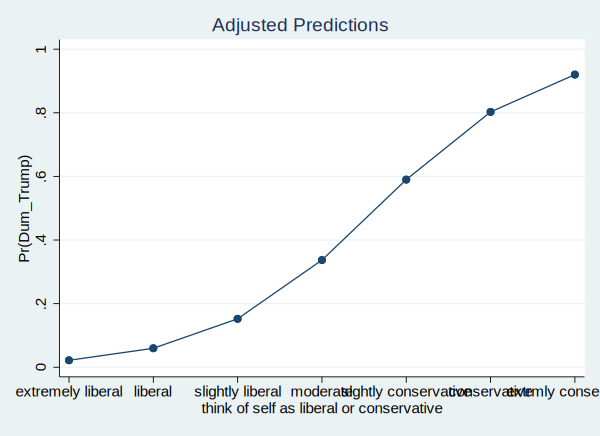

In [10]:
marginsplot, noci

## Comparison with regular regression (OLS)

The curved shaped of the line illustrate the distinctive feature of logistics regression: it bends near the "floor" and the "ceiling". We cannot get that with an ordinary regression analysis (unless we include polynomials).

To show the difference I will below run three different analyses, first a normal OLS, and then a logistic regression, and finally I do a normal regression analysis but with [dummy variables](dummy_en.html) for each value of polviews. This final analysis will show the proportion of people who voted Trump in each group, and is thus the "correct" answer. For each analysis I calculate probabilities with `margins`, and then make a graph that is saved (with the option `name()`. In front of each command I have added `quietly`, which tells Stata not to display the output - it would take up a lot of space here on the page. Finally I use `graph combine` to display all three graphs side by side.

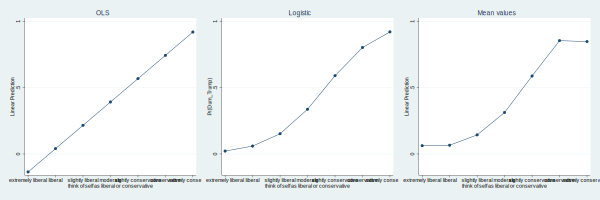

In [12]:
quietly reg dum_trump polviews
quietly margins, at(polviews = (1/7))
quietly marginsplot, name(m_ols, replace) noci title("OLS")

quietly logit dum_trump polviews
quietly margins, at(polviews = (1/7))
quietly marginsplot, name(m_logit, replace) noci title("Logistic")

quietly reg dum_trump i.polviews
quietly margins, at(polviews = (1/7))
quietly marginsplot, name(m_mean, replace) noci title("Mean values")

graph combine m_ols m_logit m_mean, ycommon rows(1) xsize(12) ysize(4)

The first thing to note is that the two graphs to the left are very similar. We can see that the more to the right respondents are, the more probable it is that they voted Trump. So we can most of the time use OLS to answer substantial questions about relationships. The coefficients are then also easy to interpret - they show the expected change in probability of having a 1 on the dependent variable when we increase the independent variable by one step. In this case it is about 0.18 - for each step right on the ideological scale the probability of a Trump vote increases by 18 percentage points.

But the downside is that we sometimes end up below 0 or over 1. And it is actually the case here. Persons on the far left have an expected probability of voting for Trump that is -14 percent! In reality, as we can see in the rightmost graph, a few people on the far left actually voted for Trump.

The logistic regression is thus close to reality. However! It is also much harder to understand for most people. From a pedagogical point of view it can therefore be important to "keep it simpele", and use OLS even when the dependent variable only can be 0 or 1. We call those models "linear probability models".

## Logistic regression with many independent variables

Just as in normal OLS we can add more independent variables, as control variables or as complementary explanatory variables, or for whatever reason we like. We then just add them on the same row, the order does not matter (but the dependent variable must always be first). Here we add one variable that measures gender, "sex". It can have the values 1 (man) or 2 (woman).

In [13]:
logit dum_trump polviews sex


Iteration 0:   log likelihood = -941.61645  
Iteration 1:   log likelihood = -670.94957  
Iteration 2:   log likelihood = -665.93439  
Iteration 3:   log likelihood = -665.91495  
Iteration 4:   log likelihood = -665.91495  

Logistic regression                             Number of obs     =      1,395
                                                LR chi2(2)        =     551.40
                                                Prob > chi2       =     0.0000
Log likelihood = -665.91495                     Pseudo R2         =     0.2928

------------------------------------------------------------------------------
   dum_trump |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    polviews |   1.050731   .0585341    17.95   0.000     .9360062    1.165456
         sex |  -.5925794   .1363231    -4.35   0.000    -.8597678    -.325391
       _cons |  -3.975402   .3198097   -12.43   0.000    -4.6

The positive effect of conservative ideology remains even under control for gender, and we can also see that women (who have the higher value on the sex variable) are less likely to vote for Trump (the coefficient is negative).

Using `margins` and `marginsplot` we can also show the relationship, graphically:




  Variables that uniquely identify margins: polviews sex


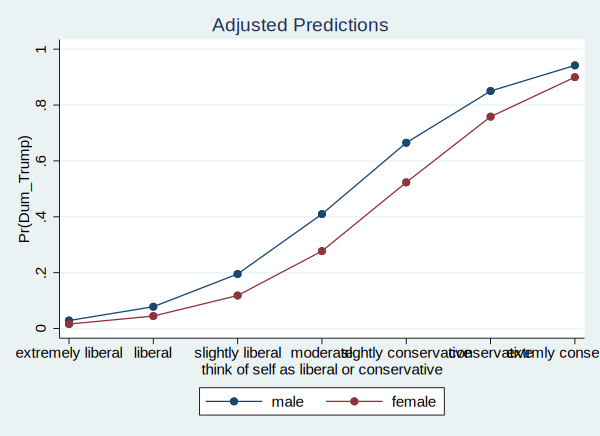

In [14]:
quietly margins, at(polviews = (1/7) sex=(1 2))
marginsplot, noci

**It is however important to be careful when looking at this graph.** The graph gives the impression that gender differences are larger in the middle of the ideological scale. Differences are indeed larger - but only when expressed in percentage points. The logistic regression builds on odds, which are relative. That means that we should think more in terms of whether probabilities are "double" or "half" rather than how many percentage points they are.

Even if the difference between men and women among those that are "extremely liberal" looks miniscule, the relationship between the odds are the same there as in the middle of the graph. We should therefore not draw any conclusions about gender differences being larger in the middle of the scale just because it looks larger. It is just a statistical artefact that follows from the nature of the logistic regression. If we really want to test an hypothesis related to that we need to have an interaction term between gender and ideology.

## Conclusion

Logistic regression is a more "correct" way of analyzing dependent variables that only can be 0 or 1. It is a good alternatie if we are interested in classifying observations, or calculating exact probabilities. If we only are interested in the general relationship between the dependent and independent variable OLS is usually a good-enough choice. And it has the advantage of being easier to interpret!